In [1]:
import math
import numpy as np
import matplotlib.pylab as plt
import ntlib as nt
from matplotlib import cm
from scipy import sparse


In [2]:
# Question 1 by using Fixed Point method


def g1(x):
    return(np.exp(-x))

nt.fixed_point(1,g1)

0.36787944117144233 1
0.6922006275553464 2
0.5004735005636368 3
0.6062435350855974 4
0.545395785975027 5
0.5796123355033789 6
0.5601154613610891 7
0.571143115080177 8
0.5648793473910495 9
0.5684287250290607 10
0.5664147331468833 11
0.5675566373282834 12
0.5669089119214953 13
0.5672762321755696 14
0.5670678983907884 15
0.567186050099357 16
0.5671190400572149 17


(0.5671190400572149, 17)

In [3]:
# Question 2 by using Simpson's Rule
def f1(x):
    return((1+(x)**4)**0.5)

nt.simpson( 0, 1, 6, f1 )

1.089428758

In [4]:
# Question 2 by using Gaussian Quadrature
def f1(x):
    return((1+(x)**4)**0.5)

degree = 3 # we choose a legender polynomial of degree 3
nt.gaussian_quad(f1, 0, 1, degree)


1.0894588167747246


1.0894588167747246

In [ ]:
#Question 3 using RK4 method

def f1(x, y):
    return (5 * x**2 - y) / np.exp(x + y)

x0 = 0
y0 = 1       # Given initial conditions
xf = 5

h1 = 0.01
h2 = 0.05    #for different step size
h3 = 0.2
h4 = 0.5

with open('h_001.txt', 'w') as file: #open file to write the output 
    x , y = nt.rk4(f1,x0,y0,h1,xf) # get the x,y values
    file.write(f"\nInterval size: {h1}\n")

    for x, y in zip(x, y):
        file.write(f"{x:.2f}\t {y:.6f}\n")


with open('h_005.txt', 'w') as file:
    x , y = nt.rk4(f1,x0,y0,h2,xf)
    file.write(f"\nInterval size: {h2}\n")

    for x, y in zip(x, y):
        file.write(f"{x:.2f}\t {y:.6f}\n")
        

with open('h_02.txt', 'w') as file:
    x , y = nt.rk4(f1,x0,y0,h3,xf)
    file.write(f"\nInterval size: {h3}\n")

    for x, y in zip(x, y):
        file.write(f"{x:.2f}\t {y:.6f}\n")
        

with open('h_05.txt', 'w') as file:
    x , y = nt.rk4(f1,x0,y0,h4,xf)
    file.write(f"\nInterval size: {h1}\n")

    for x, y in zip(x, y):
        file.write(f"{x:.2f}\t {y:.6f}\n")




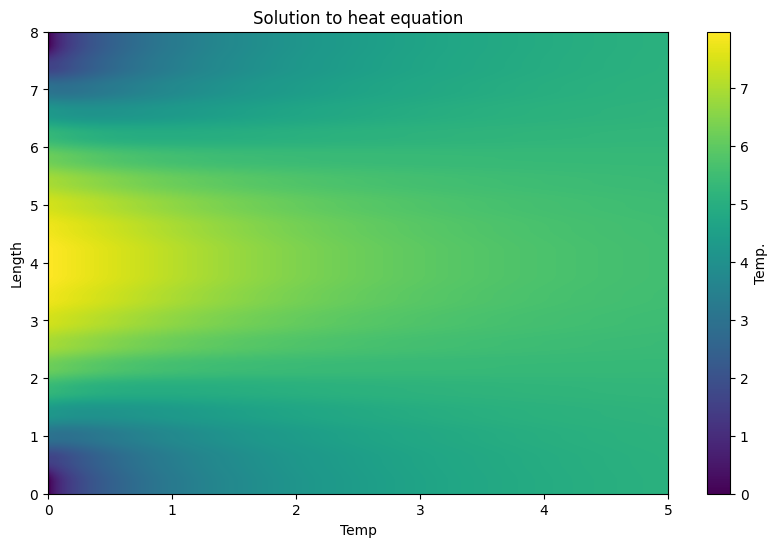

In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt
import ntlib as nt
from matplotlib import cm


U, t_o, x_o = nt.cn_method(M = 20, alpha = 0.03)  #crank-nicolson


T = 5
L = 8

# Contour plot
plt.figure(figsize=(10, 6))
plt.imshow(U, extent=[0, T, 0, L], origin='lower', aspect='auto' ,cmap='viridis')
plt.colorbar(label='Temp.')
plt.xlabel('Temp')
plt.ylabel('Length')
plt.title('Solution to heat equation')
plt.show()


with open('Crank_Nicolson.txt', 'w') as file:  #writng the output in txt file
    file.write("t\t\t")
    for x in x_o:
        file.write(f"{x:.2f}\t")
    file.write("\n---------------------------------------------------------\n")

    for i, t in enumerate(t_o):
        file.write(f"{t:.2f}\t|\t")
        for j in range(U.shape[0]):
            file.write(f"{U[j, i]:.6f}\t")
        file.write("\n")





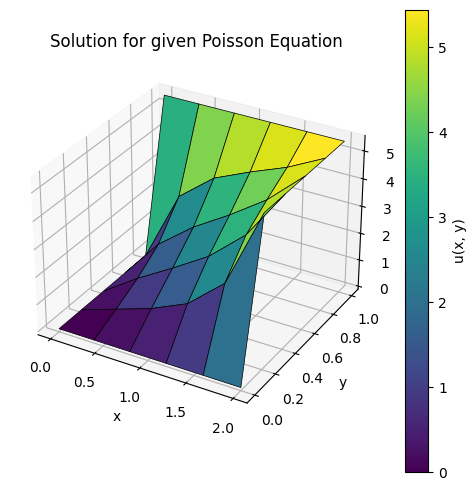

In [5]:
# Question 5 possion equation solution


n = 6 #given
delta_x = 2 / (n - 1)
delta_y = 1 / (n - 1)

x = np.linspace(0, 2, n) #given
y = np.linspace(0, 1, n) #given

X, Y = np.meshgrid(x, y)
.
# define a zero matrix
u = np.zeros((n,n))

u[:, 0] = X[:, 0] #set boundary conditions
u[:, -1] = X[:, -1] * np.exp(1)  
u[0, :] = 0 
u[-1, :] = 2 * np.exp(Y[-1, :]) 


# Solve Poisson's equation
nt.poisson(u, X, Y, n, delta_x, delta_y, 10000)


# write the output values in the text file
with open('poisson.txt', 'w') as file:
    file.write("x\t\ty\t\tu(x,y)\n")
    for i in range(n):
        for j in range(n):
            file.write(f"{X[i, j]:.2f}\t{Y[i, j]:.2f}\t{u[i, j]:.6f}\n")





#3d-plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
surface = ax.plot_surface(X, Y, u, cmap='viridis', edgecolor='k', linewidth=0.5)
    

mappable = cm.ScalarMappable(cmap='viridis')
mappable.set_array(u)
color_bar = plt.colorbar(mappable, ax=ax)
color_bar.set_label('u(x, y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
plt.title('Solution for given Poisson Equation')
plt.show()